# **PROSES KLASTERING DATA TWITTER**
**Keyword "JAKI"**



***Install Library SNSscrape***

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Install Library langdetect***

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=697a0297ec2b7a18e3efe803ef540371a0676937f25e919aafacfcb2ed059060
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


***Import snscrape.modules.twitter and json.***

In [3]:
import snscrape.modules.twitter as stw
import json
from langdetect import detect

***Menentukan Query***

In [19]:
keywords=['jaki']
start="2022–16–15"
end ="2022–17–15"
max_num=300
fname='tweet.json' 
languages=['id','en']

***Import library Pandas***

In [20]:
import pandas as pd
datatwitt=[]

# **Memulai Scraping**

In [21]:
for keyword in keywords:
   
    for i, tweet in enumerate (stw.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatwitt.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [22]:
datatwitt

['@arifinpribadi @CNNIndonesia Ada JAKI, cukup modal kuota sedikit dan responnya lebih cepat dibanding kena macet dan kepanasan/kehujanan utk dateng ke balaikota',
 '(COD) Converse 70S HI Black White Egret 100% Original Sneakers Casual Pria Wanita\n\n➖ Diskon 31% Rate 4.8 ⭐\n🔗 https://t.co/J5TOJjcyWQ\n\nREST OF MY LIFE Semoga 2025 Editan Baekhyun Wamil ITZY JAKI LE SSERAFIM #apobangpo #SMTreatRENJUNBetter #MEWxSUHO #BTSJIN https://t.co/sReTMntb4I',
 'Selamat Malam Lampung Timur,\nJika kamu jadi chef dan punya restoran, makanan apa yang akan kamu sajikan?\n\nKode Referral SeaBank : FBDBCA\n\nJAKI',
 '@asumsico Kan ada JAKI pak',
 'Era jahiliah:\nBuka aplikasi JAKI laporkan, respon realtime, langsung tindakan\n\nEra Digital:\nBrgkt dr rmh naik Jaklingko (Rp 0,- gak tau nanti?), nyambung busway turun dihalte dpn balkot, antri, aduan dicatat, tunggu disposisi ke dinas yg terkait.. 🙃\nKemajuan versi Yusuf DumbDumb',
 '@TheSprinklesCat Happy Gotcha Day Sprinkles 😻😺😽 Jaki 🐈 😽 🎂🎉🎁 #CatsOfTwitt

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


# **Melakukan Proses Stemming**

In [23]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatwitt:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [29]:
documents_clean[0:10]

['arifinpribadi cnnindonesia jaki cukup modal kuota sedikit responnya lebih cepat banding kena macet panas hujan utk dateng balaikota',
 'cod converse s hi black white egret original sneakers casual pria wanita diskon rate https t co jtojjcywq rest of my life moga edit baekhyun wamil itzy jaki le sserafim apobangpo smtreatrenjunbetter mewxsuho btsjin https t co sretmntbi',
 'selamat malam lampung timur kamu jadi chef punya restoran makan apa akan kamu saji kode referral seabank fbdbca jaki',
 'asumsico kan jaki pak',
 'era jahiliah buka aplikasi jaki lapor respon realtime langsung tindak era digital brgkt dr rmh naik jaklingko rp gak tau nyambung busway turun halte dpn balkot antri adu catat tunggu disposisi dinas yg kait maju versi yusuf dumbdumb',
 'thesprinklescat happy gotcha day sprinkles jaki catsoftwitter',
 'black amp white outfit reccommendation thread bangtan we will wait for you army jaki nokia moga edit edit wamil seokjin itzy sarah ipad macbook pinggang slingbag racun shop

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

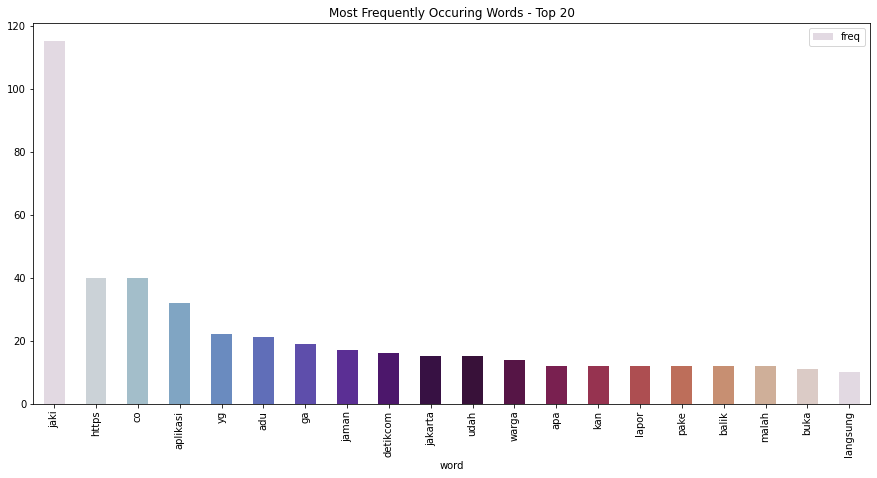

In [30]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [31]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

***Menampilkan hasil cluster***

In [52]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 jaki
 co
 https
 aplikasi
 yg
 adu
 jaman
 udah
 detikcom
 jakarta
Cluster 1:
 ga
 jaki
 aplikasi
 drun
 gubernur
 mau
 malah
 ahok
 adu
 yg
Cluster 2:
 warga
 jakarta
 baca
 kerja
 rasa
 jaki
 hansssolo
 pantesan
 gak
 kota




***Input prediksi kata tertentu***

In [55]:
print("Prediction")
Y = cv.transform(["jakarta"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["kota"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


# **Menampilkan Grafik**

***Grafik Dendogram***

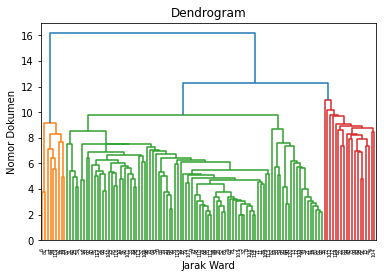

In [47]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

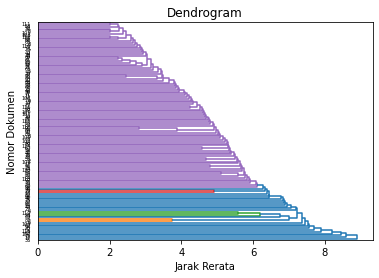

In [43]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

***Hasil dengan algoritma Agglomerative Clustering***

In [45]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 2 0 1 0 0 0 2 1 0 0 0 0 0 0 3
 0 0 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0
 0 2 0 0 0 0 0 1 2 2 0 0 0 0 0 1 0 2 0 0 2 0 0 0 0 2 0 0 5 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


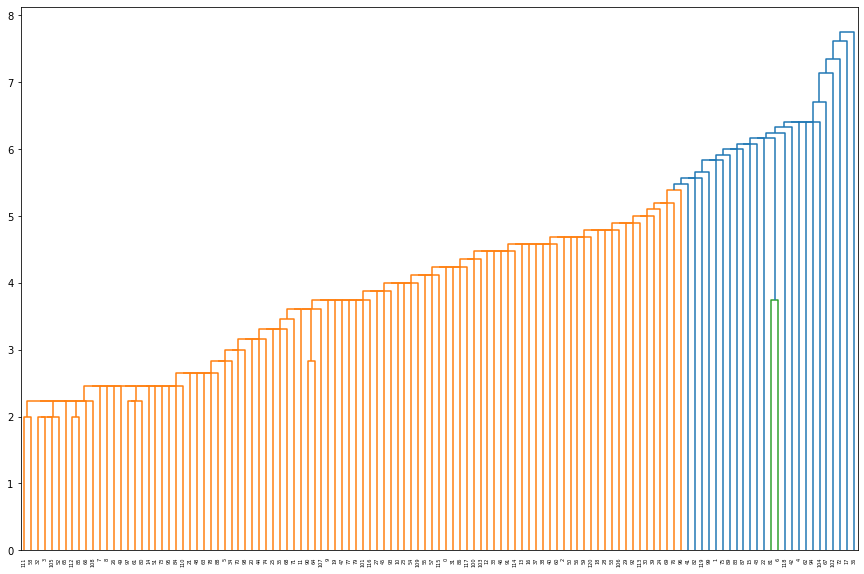

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(15, 10))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
